In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# File paths
train_file = '../poker+hand/poker-hand-training-true.data'
test_file = '../poker+hand/poker-hand-testing.data'

In [3]:
# Load training data
train_data = np.loadtxt(train_file, delimiter=',')
X_train = train_data[:, :-1]
y_train = train_data[:, -1].astype(int)

# Load testing data
test_data = np.loadtxt(test_file, delimiter=',')
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (25010, 10) (25010,)
Testing data shape: (1000000, 10) (1000000,)


In [4]:
# MultinomialNB requires non-negative discrete feature values
# scale features to [0, 1] and multiply to make them discrete integers
scaler = MinMaxScaler()
X_train_scaled = (scaler.fit_transform(X_train) * 10).astype(int)
X_test_scaled = (scaler.transform(X_test) * 10).astype(int)

# Initialize model
model = MultinomialNB()

In [5]:
# Train the model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [6]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.494599

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.94      0.65    501209
           1       0.42      0.06      0.10    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.49   1000000
   macro avg       0.09      0.10      0.08   1000000
weighted avg       0.43      0.49      0.37   1000000


Confusion Matrix:
 [[470797  28230      0      0      0      0      0   2182      0      0]
 [396981  23802      0      0      0      0      0   1715      0      0]
 [ 44701   2755      0      0  

/Users/faheemmazhar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/faheemmazhar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/faheemmazhar/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

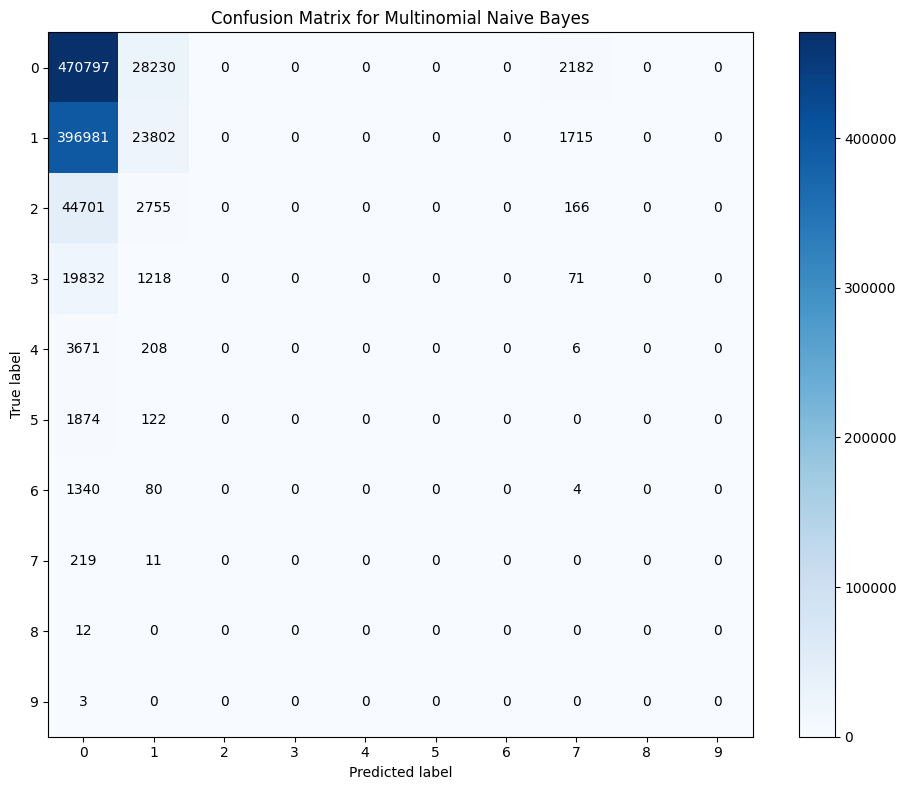

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()